帰無仮説：温度の条件が合成樹脂の製造量に変化を与えない

対立仮説：温度の条件が合成樹脂の製造量に変化を与える

帰無仮説：時間の条件が合成樹脂の製造量に変化を与えない

対立仮説：時間の条件が合成樹脂の製造量に変化を与える

尚、有意水準は5%とする

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

sns.set_theme()

In [4]:
data = pd.read_csv('reagents_data.csv')

In [5]:
data.head()

,Temp,Time,Volume
0,100,10,21.624345
1,100,10,19.388244
2,100,10,19.471828
3,100,10,18.927031
4,100,10,20.865408


<Axes: xlabel='Time', ylabel='Volume'>

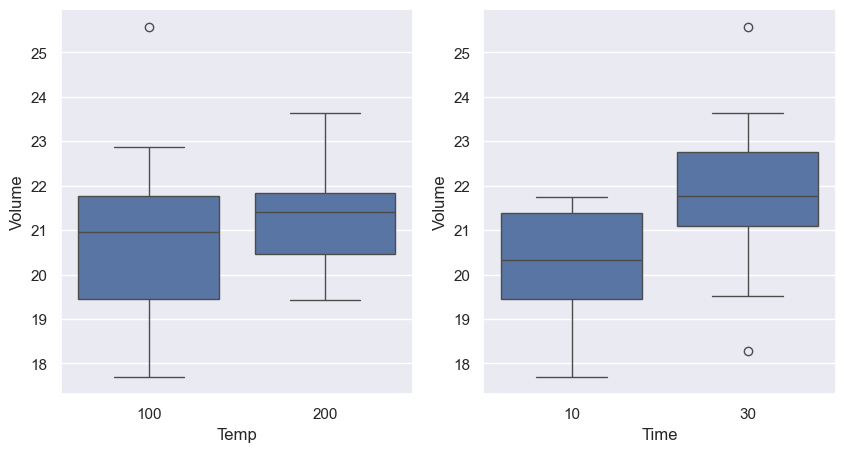

In [8]:
f, axes = plt.subplots(1, 2, figsize=(10,5))


sns.boxplot(x='Temp', y='Volume', data=data, ax=axes[0])
sns.boxplot(x='Time', y='Volume', data=data, ax=axes[1])

In [13]:
mean_all = np.mean(data['Volume'])
print(f'全データの製造量の平均値: {mean_all}')

全データの製造量の平均値: 21.064619498696484


In [15]:
mean_Temp_100 = np.mean(data.query('Temp == 100')['Volume'])
mean_Temp_200 = np.mean(data.query('Temp == 200')['Volume'])
mean_Time_10 = np.mean(data.query('Time == 10')['Volume'])
mean_Time_30 = np.mean(data.query('Time == 30')['Volume'])
print(f'温度100度の平均製造量: {mean_Temp_100}')
print(f'温度200度の平均製造量: {mean_Temp_200}')
print(f'時間10分の平均製造量: {mean_Time_10}')
print(f'時間30分の平均製造量: {mean_Time_30}')

温度100度の平均製造量: 20.81095130951942
温度200度の平均製造量: 21.318287687873553
時間10分の平均製造量: 20.32047783804376
時間30分の平均製造量: 21.80876115934921


In [42]:
# 全体の平方和
squares_all = np.sum((data['Volume'] - mean_all) ** 2)
print(f'全体の平方和：{squares_all}')

# 温度条件の平方和
Temp_means_list = [mean_Temp_100]*data.query('Temp == 100').shape[0] + [mean_Temp_200]*data.query('Temp == 200').shape[0]
Temp_means_ndarray = np.array(Temp_means_list)
squares_Temp = np.sum((Temp_means_ndarray - mean_all) ** 2)
print(f'温度条件の平方和：{squares_Temp}')

# 時間条件の平方和
Time_means_list = [mean_Time_10]*data.query('Time == 10').shape[0] + [mean_Time_30]*data.query('Time == 30').shape[0]
Time_means_ndarray = np.array(Time_means_list)
squares_Time = np.sum((Time_means_ndarray - mean_all) ** 2)
print(f'時間条件の平方和：{squares_Time}')

# 誤差の平方和
squares_residual = squares_all - squares_Temp - squares_Time
print(f'誤差の平方和：{squares_residual}')

全体の平方和：90.77291728168147
温度条件の平方和：2.5739020080148745
時間条件の平方和：22.14987244475978
誤差の平方和：66.04914282890682


In [43]:
df_Temp = 1         # 温度条件の自由度
df_Time = 1         # 反応時間の自由度
df_residual = 37    # 誤差の自由度
print(f'温度条件の自由度: {df_Temp}')
print(f'反応時間の自由度: {df_Time}')
print(f'誤差の自由度: {df_residual}')

温度条件の自由度: 1
反応時間の自由度: 1
誤差の自由度: 37


In [39]:
# F比を求めるたの各種分散
variance_Temp = squares_Temp / df_Temp
variance_Time = squares_Time / df_Time
variance_residual = squares_residual / df_residual

In [44]:
# 温度条件のF比
F_Temp = variance_Temp / variance_residual
print(f'温度条件のF比: {F_Temp}')

# 反応時間のF比
F_Time = variance_Time / variance_residual
print(f'反応時間のF比: {F_Time}')

温度条件のF比: 1.4418714644525323
反応時間のF比: 12.408113797616654


In [47]:
# 温度条件のP値
p_value_Temp = 1 - sp.stats.f.cdf(x=F_Temp, dfn=df_Temp, dfd=df_residual)
print(f'温度条件のP値: {p_value_Temp}')

# 反応時間のP値
p_value_Time = 1 - sp.stats.f.cdf(x=F_Time, dfn=df_Time, dfd=df_residual)
print(f'反応時間のP値: {p_value_Time}')

温度条件のP値: 0.23746784737213267
反応時間のP値: 0.0011555176940120093


In [49]:
# Statsmodelsの命令を使って、二元分散分析を実行し、結果の表を表示
anova_model = smf.ols('Volume ~ Temp + Time', data=data).fit()
sm.stats.anova_lm(anova_model, typ=2)

,sum_sq,df,F,PR(>F)
Temp,2.573902,1.0,1.441871,0.237468
Time,22.149872,1.0,12.408114,0.001156
Residual,66.049143,37.0,NaN,NaN


結果のように、温度条件についてはP値が有意水準を超えるため、有意差があるとは言い切れず、温度の条件が合成樹脂の製造量に変化を与えるとは言い切れない。
同様に、反応時間についてはP値が有意水準以下のため、有意差があり、帰無仮説を棄却し、対立仮説を採用する。したがって、時間の条件が合成樹脂の製造量に変化を与える。